In [1]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import scipy as sp
import pandas as pd
import re
import os
from importlib import reload
import seaborn as sns
import analise
from analise import ior,find_reports
reload(analise)
reload(ior)

sns.set_style("whitegrid")

In [8]:
data=ior.load_reports("../results/archer2-work4/fpp").query("op=='write'").sort_values(by="tasks").query("stripes>0")
data

,op,bandwidth,nodes,tasks,stripes
8,write,0.51698,1,1,1
2,write,0.66091,1,1,1
4,write,0.30785,1,1,1
6,write,0.58207,1,1,1
10,write,0.52317,1,1,1
...,...,...,...,...,...
4,write,25.66400,3,384,1
6,write,23.56200,3,384,1
8,write,26.06300,3,384,1
10,write,17.96500,3,384,1


In [9]:
data_agg=ior.aggregate_OST(data).dropna()
data_agg

nodes tasks     op stripes  bandwidth          
                                 average       std
0      1     1  write       1   0.478717  0.117208
1      1     4  write       1   1.581367  0.595445
2      1    16  write       1   5.138483  1.513923
3      1    32  write       1   7.347700  1.676551
4      1    64  write       1   9.223100  1.453917
5      1   128  write       1  10.089100  2.284618
6      3     3  write       1   1.069869  0.263847
7      3    12  write       1   5.299560  1.600810
8      3    48  write       1  10.378400  1.922737
9      3    96  write       1  14.236200  2.131719
10     3   192  write       1  18.590500  2.329413
11     3   384  write       1  19.473700  6.285055

In [141]:
#ior.scatter_plot_ost(data)
#plt.show()
#ior.scatter_plot_ost_aggregated(data_agg)
#plt.show()

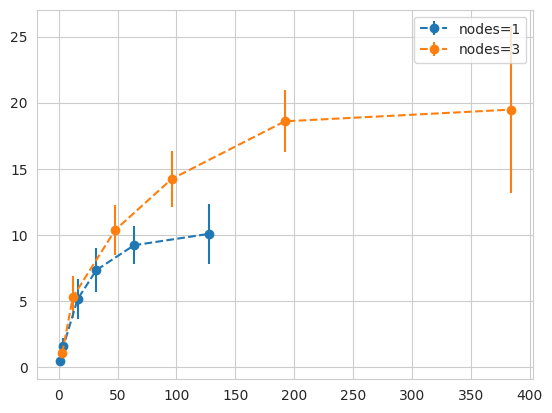

In [146]:

for value,_data in data_agg.sort_values("tasks").groupby("nodes"):
        plt.errorbar( _data.loc[:,"tasks"] , _data.loc[:,('bandwidth', 'average')],_data.loc[:,('bandwidth', 'std')],label=f"nodes={value}",fmt="o--")
plt.legend()

In [473]:
def build_mdtest_pattern():
    pattern_float=r"(\d+(?:\.\d+)?)"
    patter_int=r"(\d+)"
    pattern=r"^\s*File\s+(\w+)"
    for i in range(4):
        pattern=pattern + r"\s+" + pattern_float
    pattern=pattern+r"$"
    return pattern




def load(filename):
    pattern=build_mdtest_pattern()
    data={("operation",""):[],("bandwidth","average"):[],("bandwidth","std"):[]}
    tasks=None
    files=None
    nodes=None
    with open(filename) as f:
        section=None
        for line in f.readlines():

            m=re.match(r"(\d+)\s+tasks,\s+(\d+)\s+files",line.strip())
            if m is not None:
                #print(m)
                tasks=int(m[1])
                files=int(m[2])

            m=re.match(r"nodes: (\d+)",line.strip())
            if m is not None:
                #print(m)
                nodes=int(m[1])
                
            
            m=re.match(r"SUMMARY\s+(\w+)\s+\(in ops\/sec\): \(of\s+(\d+)\s+iterations\)",line.strip())
            if m is not None:
                if m[1]=="rate":
                    section="bandwidth"
                else:
                    section=None
            if section=="bandwidth":
                m=re.match(pattern,line.strip()) 
                if m is not None:
                    data[("operation",'')].append(m[1])
                    data[('bandwidth','average')].append(float(m[4])/1e+3)
                    data[('bandwidth','std')].append(float(m[5])/1e+3)
    data=pd.DataFrame(data)
    data[("nodes","")]=nodes
    data[("tasks","")]=tasks
    data[("files","")]=files

    return data

def load_reports(directoryname):
    
    return pd.concat([pd.DataFrame(load(filename)) for filename in find_reports(directoryname)])

In [466]:
filename="../results/archer2-work4/md_easy_onOST/report-md-4N-128cpN-nf10000-2024-02-16-17.10.14.txt"
load(filename)

operation  bandwidth           nodes tasks files
               average       std                  
0  creation  48.030303  4.359896     4   512  9728
1      stat  97.087567  1.300584     4   512  9728
2      read  71.503236  7.852856     4   512  9728
3   removal  24.782461  1.368758     4   512  9728

In [477]:
data=load_reports("../results/archer2-work4/md_hard//")
data=data[(data["nodes"]==4) & (data["files"]>0)]
data

operation   bandwidth      nodes tasks   files
                average  std                    
0  creation    6.735260  0.0     4   512     512
1      stat   10.894794  0.0     4   512     512
2      read   10.751772  0.0     4   512     512
3   removal    7.055341  0.0     4   512     512
0  creation    3.417107  0.0     4   512    9728
1      stat   85.371659  0.0     4   512    9728
2      read   62.563540  0.0     4   512    9728
3   removal    7.113185  0.0     4   512    9728
0  creation    3.064745  0.0     4     4  100000
1      stat    9.042098  0.0     4     4  100000
2      read    3.216993  0.0     4     4  100000
3   removal    7.747233  0.0     4     4  100000
0  creation    6.396203  0.0     4   256   99840
1      stat  119.814353  0.0     4   256   99840
2      read   69.810473  0.0     4   256   99840
3   removal    6.814314  0.0     4   256   99840
0  creation    2.278678  0.0     4   256    9984
1      stat   88.512975  0.0     4   256    9984
2      read   56.429036  0.0     4   256    9984
3   removal    7.682818  0.0     4   256    9984
0  creation    7.068634  0.0     4   128    9984
1      stat  101.629756  0.0     4   128    9984
2      read   54.644277  0.0     4   128    9984
3   removal    7.951393  0.0     4   128    9984
0  creation    2.164333  0.0     4     4    1000
1      stat    6.289349  0.0     4     4    1000
2      read    1.801217  0.0     4     4    1000
3   removal    6.981431  0.0     4     4    1000
0  creation    7.937005  0.0     4   256     768
1      stat   29.286264  0.0     4   256     768
2      read   17.455716  0.0     4   256     768
3   removal    7.798614  0.0     4   256     768
0  creation    7.251009  0.0     4   128     896
1      stat   48.537285  0.0     4   128     896
2      read   17.541443  0.0     4   128     896
3   removal    8.099223  0.0     4   128     896
0  creation    2.162374  0.0     4     4   10000
1      stat    6.829626  0.0     4     4   10000
2      read    2.146422  0.0     4     4   10000
3   removal    7.838771  0.0     4     4   10000
0  creation    8.652255  0.0     4   128   99968
1      stat  122.609899  0.0     4   128   99968
2      read   61.014548  0.0     4   128   99968
3   removal    6.923647  0.0     4   128   99968
0  creation    7.699181  0.0     4   512   99840
1      stat  137.014089  0.0     4   512   99840
2      read   72.005343  0.0     4   512   99840
3   removal    6.764601  0.0     4   512   99840
0  creation    1.042143  0.0     4     4     100
1      stat    4.874717  0.0     4     4     100
2      read    1.086331  0.0     4     4     100
3   removal    4.449387  0.0     4     4     100

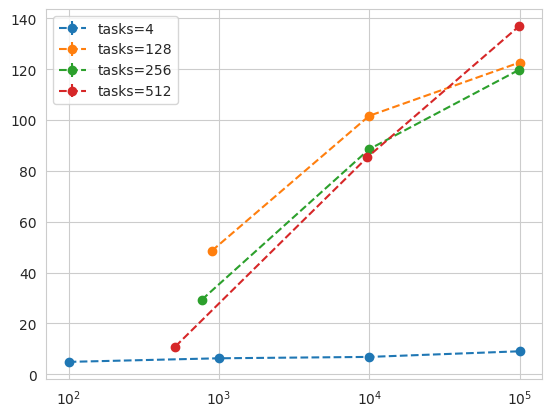

In [479]:
fig,ax=plt.subplots()
for value,_data in data[data["operation"]=="stat"  ].sort_values("files").dropna().groupby("tasks"):
    plt.errorbar(_data[("files",'')],_data[("bandwidth","average")],_data[("bandwidth","std")],label=f"tasks={value}",fmt="o--")
plt.legend()
plt.xscale("log")